> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMBD Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [62]:
df = pd.read_csv(r'tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Questions

<li>1-does the budget affect the revenue?</li>
<li>2-does the rate affect the revenue?</li>
<li>3-in which year the movies were most popular?</li>
<li>4-in which year the movies had the most revenue?</li>
<li>5-how many movies in the data?</li>
<li>6-Which genres are most popular from year to year?</li>

In [63]:
# a function gets the number of deleted columns and rows from the orignal data till we use it 
def deleted_rows_and_columns(x,y):
    print('the number of deleted rows is :',(x[0]-y[0]))
    print('the number of deleted columns is :',(x[1]-y[1]))

In [64]:
Before= df.shape # tuple contains the number of rows and columns before any cleaning
Before

(10866, 21)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [66]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [67]:
# I droped some columns that I won't use in the data like id,imbd,etc
# I also droped some columns like revenue_adj and budget_adj cause I found in the describtion that the adj_revenue has the same stats like the revenue and the same for bugjet
df.drop(columns=['id','imdb_id','homepage','overview','tagline','vote_count','release_date','revenue_adj','budget_adj'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [68]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
dtype: int64

In [69]:
df.duplicated().sum()

1

In [70]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#### I wanted to know if the revenue matched with the popularity before deleting any more rows as they haven't null values

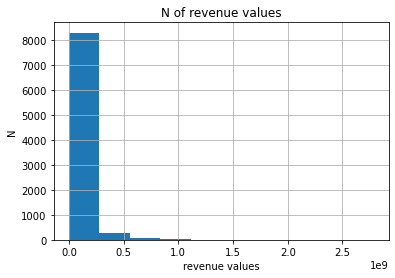

In [71]:
df['revenue'].hist()
plt.title('N of revenue values')
plt.xlabel('revenue values')
plt.ylabel('N');

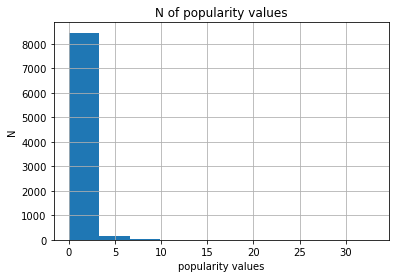

In [72]:
df['popularity'].hist()
plt.title('N of popularity values')
plt.xlabel('popularity values')
plt.ylabel('N');

In [73]:
df.isnull().sum().sum()

0

In [74]:
df.duplicated().sum()

0

In [75]:
After = df.shape # tuple contains the number of rows and columns after the cleaning
After

(8666, 12)

In [76]:
deleted_rows_and_columns(Before,After)

the number of deleted rows is : 2200
the number of deleted columns is : 9


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8666 non-null   float64
 1   budget                8666 non-null   int64  
 2   revenue               8666 non-null   int64  
 3   original_title        8666 non-null   object 
 4   cast                  8666 non-null   object 
 5   director              8666 non-null   object 
 6   keywords              8666 non-null   object 
 7   runtime               8666 non-null   int64  
 8   genres                8666 non-null   object 
 9   production_companies  8666 non-null   object 
 10  vote_average          8666 non-null   float64
 11  release_year          8666 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 880.1+ KB


In [78]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000
mean,0.741937,1.770937e+07,4.924863e+07,103.815140,6.003612,2000.129818
std,1.087657,3.357362e+07,1.289529e+08,26.207186,0.893539,13.221278
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.249990,0.000000e+00,0.000000e+00,91.000000,5.500000,1993.000000
50%,0.449377,1.500000e+06,1.793820e+05,100.000000,6.100000,2004.000000
75%,0.842984,2.100000e+07,3.890269e+07,113.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,705.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (does the budget affect the revenue?)

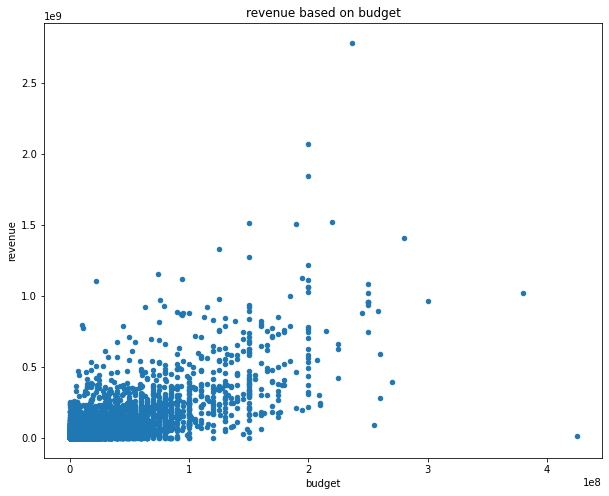

In [79]:
df.plot(x= 'budget', y = 'revenue',kind= 'scatter',figsize=(10,8))
plt.title('revenue based on budget');

yes the budget affect the revenue




### Research Question 2  (does the rate (vote_average) affect the revenue?)

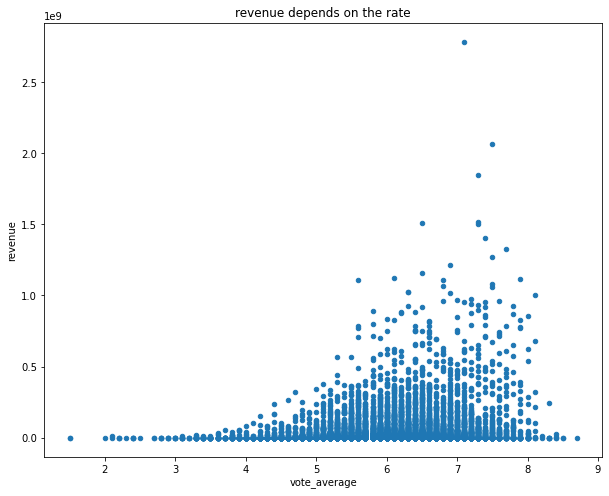

In [80]:
df.plot(x= 'vote_average', y = 'revenue',kind= 'scatter',figsize=(10,8))
plt.title('revenue depends on the rate');

yes the rate affect the revenue




### Research Question 3  (in which year the movies were most popular?)

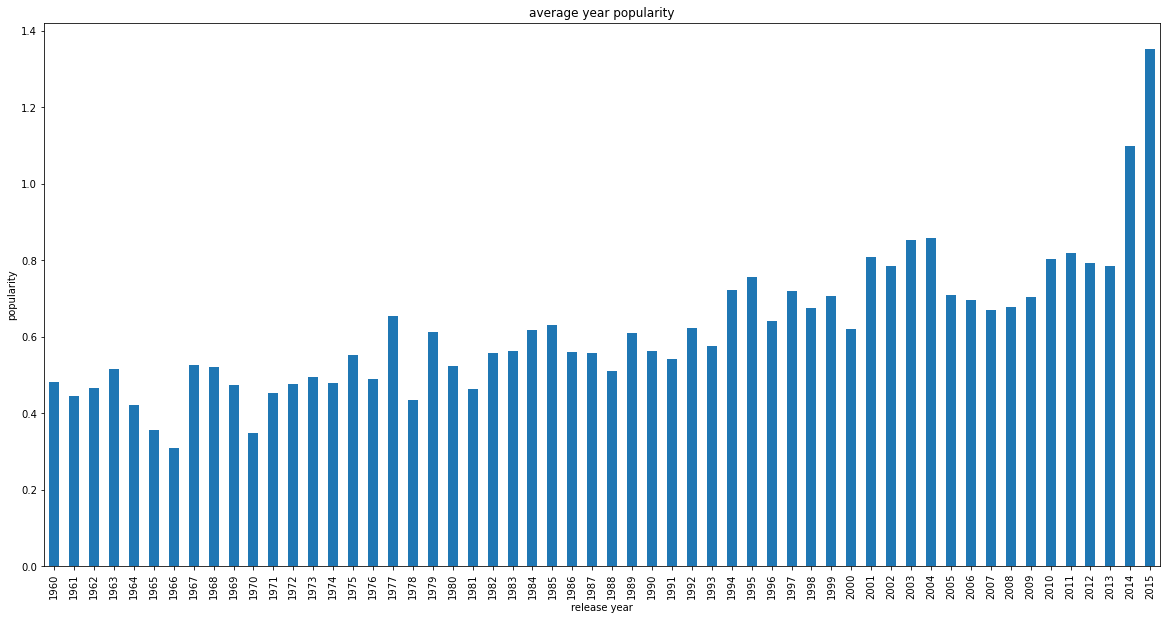

In [81]:
df.groupby('release_year').popularity.mean().plot(kind= 'bar',figsize=(20,10))
plt.title('average year popularity')
plt.xlabel('release year')
plt.ylabel('popularity');

2015 is the year were the movies were most popular

### Research Question 4  (in which year the movies had the most revenue?)

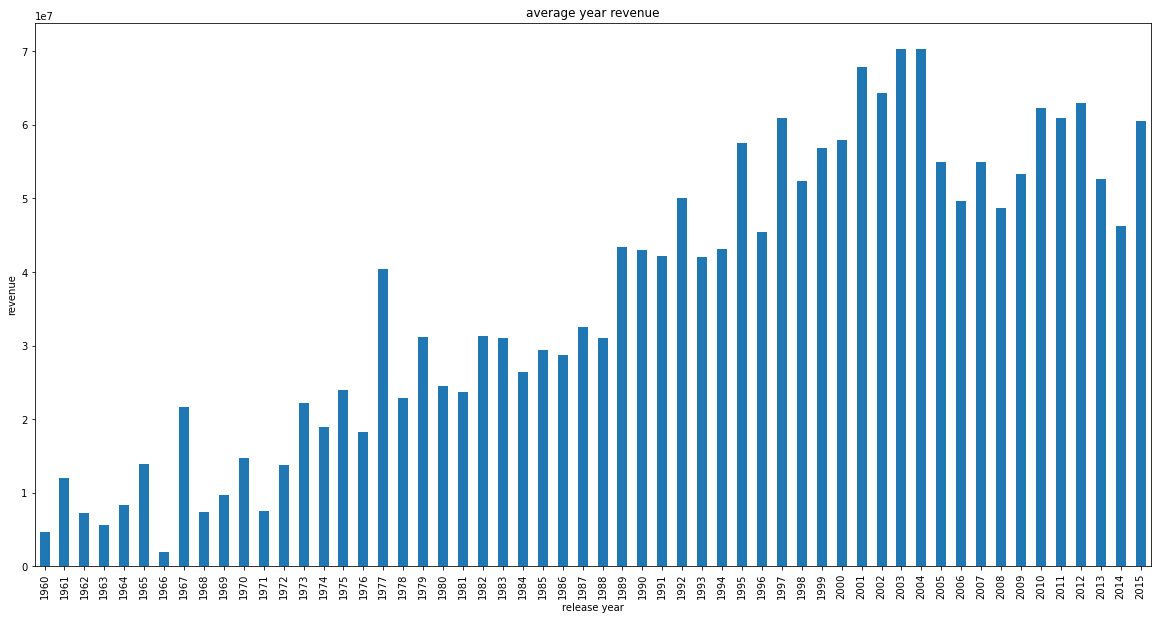

In [82]:
df.groupby('release_year').revenue.mean().plot(kind= 'bar',figsize=(20,10))
plt.title('average year revenue')
plt.xlabel('release year')
plt.ylabel('revenue');

In [83]:
#the visual analysis doesn't show us if the 2004 revenue is the most revenue or 2003
df.groupby('release_year').revenue.mean()[2004] > df.groupby('release_year').revenue.mean()[2003]  

True

so 2004 is the most revenue year

### Research Question 5  (how many movies in the data?)

In [84]:
# the movies usually have runtime from 85 to 200 minutes
df_movies = df.query('runtime >= 85')
df_movies = df.query('runtime <= 200')
df_movies = df.query('revenue > 0')
df_movies = df.query('popularity > 0')
df_movies = df.query('budget > 0')
After = df_movies.shape
After

(4726, 12)

In [85]:
deleted_rows_and_columns(Before,After)

the number of deleted rows is : 6140
the number of deleted columns is : 9


there is 3528 movies in the data 

### Research Question 6  (Which genres are most popular from year to year?)

In [86]:
# first we group the data by release year and genres, and calculate the average popularity for each group
grouped = df.groupby(['release_year', 'genres']).agg({'popularity': 'mean'})

# then we find the most popular genres for each release year
most_popular = grouped.groupby('release_year')['popularity'].transform(max) == grouped['popularity']

# finally we filter the results to only show the most popular genres for each release year
result = grouped[most_popular].reset_index()

result

,release_year,genres,popularity
0,1960,Drama|Horror|Thriller,2.610362
1,1961,Adventure|Animation|Comedy|Family,2.631987
2,1962,Adventure|Action|Thriller,3.170651
3,1963,Action|Thriller|Adventure,2.508235
4,1964,Adventure|Action|Thriller,3.153791
5,1965,Adventure|Action|Thriller,1.910465
6,1966,Animation|Family|Comedy,1.227582
7,1967,Family|Animation|Adventure,2.550704
8,1968,Science Fiction|Mystery|Adventure,3.309196
9,1969,Adventure|Action|Thriller,1.778746


# Conclusion

### results
<li>1-the budget affect the revenue</li>
<li>2-the rate also is affecting the revenue</li>
<li>3-in 2015 the movies were most popular</li>
<li>4-in 2004 the movies had the most revenue</li>
<li>5-there is 3528 movies in the data</li>

### limitation
<li>1-the data contains some short movies and some series ,so that make it harder to get the movies analysis</li>
<li>2-we need more samples of data</li>
<li>3-we don't know if the rate is the rate of the critics or the audience</li>

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295